# **COGS 108 - Final Project** 

# **Overview**

---





This project takes advantage of naturalized language processing and unsuperivsed machine learning to examine the potential topics within Yelp reviews toward San Diego parks. After preprocessing and deploying a vanilla Latent Dirichlet Allocation (or LDA) topic generating model, it seems there are three aspects to parks Yelp reviewers are interested in. These revolve around park location, time of year, and opportunities to engage with others, like kids, pets, or friends/family. My interest in conducting this text as data analysis stems from my intention to use these methods in graduate school to earn a Ph.D. in political science and ultimately identify the relation between legislation and racial/ethnic identity. 

# **Name & GitHub ID**

---



- Name: Alex Richard Zhao [A15571627]
- GitHub Username: arzhao-coding

# **Research Question**

---



Based on recent Yelp reviews of San Diego parks, what aspects of parks do reviewers focus on?

## **Background and Prior Work**

---



Considering many people infer the quality of a product based on its ratings and additional information provided in reviews, different companies have started using natural language processing to identify trends and sentiments. Amazon is one such corporation who uses a similar approach to analyzing the reviews of their products (Amazon). This project does not modify their code, but instead relies on the concept of investigating reviews to conduct an LDA topic generation to identify what aspects reviewers focus on. Most of the code was developed during my time in CSS 100 (Computational Social Science), an upper division coding course dedicated to machine learning in python (hosted by the Department of Pyschology at UCSD). 

Automated text analysis and natural language processing are increasingly fruitful methods for unsupervised machine learning. The LDA method itself was presented to academia in 2003 and relies on word frequency and distances calculated from a document-term matrix. The process inputs these features into a poisson and dirichlet distribution to calculate the probability a document lies within one of a prescribed number of topics (Biel et. al.). 

An example much more pertinent to my own interests is the work by Professor Margaret Roberts on structural topic modeling. Her 2014 paper expands upon how LDA was a foundational finding for automated text analysis and new methods in structural topic modeling to find allow additional inputs like feature correlation to improve topic generation (Roberts). 

Overall, the Amazon example is most applicable for this project and the results of the LDA topic generation will reveal insights regarding what topics Yelp reviewers revolve around. Furthermore, this should provide insights into what aspects of parks are being most discussed about and can be valuable knowledge for improving parks if social scientists uncover the aspects people are most interested in (proxied by what they're reviews are). 

References (include links):
- 1) https://www.scrapehero.com/how-to-analyse-product-reviews-using-lda-topic-modelling/
- 2) https://dl.acm.org/doi/10.5555/944919.944937
- 3) https://scholar.harvard.edu/dtingley/files/topicmodelsopenendedexperiments.pdf

# **Hypothesis**

---




Null: Yelp reviewers do not focus on any aspect of parks in particular, therefore any topics generated will be highly similar or nonsensical. Highly similar topics will appear similar on intertopic distance maps (via multidimensional scaling). Meanwhile nonsensical topics will contain terms that do not seem sensible to infer the topics meaning. 

Alternative Hypothesis: Yelp reviewers do focus on particular aspects of parks and a vanilla LDA topic generation model will generate at least two topics of interest to examine and infer their meaning. There could be more topics generated and it will depend if the LDA model is splitting topics if forced to coerce results to acheive the prescribed number of topics (which is changeable). All writing has patterns toward something, especially if it is on the same subject, so I believe that there are at least three or four topics that people generally focus on. It is too incongruous to hypothesize what those particular topics may be but I am confident the reviews do focus on a few aspects of parks that would be worth noting for the city of San Diego's department of parks and recreation. 

# **Dataset(s)**

---



- Dataset Name: San Diego Parks Yelp Data (yelp_SD_reviews.csv)
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_reviews.csv
- Number of observations: This dataset contains 2333 observations and 3 features. 

Yelp is an American company that publishes crowd-sourced reviews about businesses. Sometimes the company is used for reservations or other services. The dataset used are the reviews pertaining to San Diego parks which have been curated by Professor Ellis of the Cognitive Science Department at UC San Diego. 

Originally, I had plans to aggregate datasets and sort topic generation per location or reviews, however time constraints have left me with only generating topics. In short, I did not combine any datasets for this project.

# **Setup**

---

Importing Modules

In [1]:
# Regular Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Natural Language Processing Modules
import re
import string
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict 

# Topic Generation and Visualization
from sklearn.decomposition import LatentDirichletAllocation as LDA
import pylab as py 
!pip install pyLDAvis
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda

In [2]:
# Removing Warning Messages
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\Alex Richard Zhao\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading Stopwords from the NLTK library for Natural Language Processing

In [3]:
# Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Alex Richard
[nltk_data]     Zhao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Cleaning

---



Data Cleaning and Preprocessing consisted of removing punctuation, lowercasing the text, removing stop words, and stemming the reviews. Each step will be discussed below. 

Fortunately, I did not have to perform any data merging so I just loaded the raw data from github. 

In [4]:
url = "https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_reviews.csv"
reviews = pd.read_csv(url)
reviews.head()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


In [5]:
print(f'The data contains', reviews.shape[0], "rows and", reviews.shape[1], "columns")

The data contains 2333 rows and 3 columns


**Preprocessing**

All preprocessing takes place with the text column itself. 

First, I removed the punctuation by using a regular expression ("re" library) and line comprehension. The code takes each text (after converting the text column into a list) and replace the punctuation marks with an empty space.

In [6]:
## Removing Punctuation
reviews.text = [re.sub(r'[^\w\s]', '', str(x)) for x in reviews.text.tolist()]

Lowercased each text in a similar process

In [7]:
## Lowercasing
reviews.text = [str(x).lower() for x in reviews.text.tolist()]

Removed the stop words. However, I also removed the frequent occurring words of "san diego", "park", "place", and "la jolla" since the dataset would naturally have these words frequently. Removing these stopwords would assist in extracting meaning and assist the LDA process without thinking these meaningless words have extraordinary value because they're incredibly frequent

To achieve this, I created a function to remove stop words

In [8]:
## Removing Stopwords
# Initializing stop words
stop_words = set(stopwords.words('english')) 
stop_words.update(["san", "diego", "park", "la", "jolla", "place"])

# Define a function of removing stop words
def remove_stopwords(texts):
    return [' '.join([word for word in str(doc).split() if word not in stop_words]) for doc in texts]

In [9]:
# Applying Function
reviews.text = remove_stopwords(reviews.text.tolist())

To stem the texts I followed a similar process and created another function to take advantage of the Porter Stemmer. 

In [10]:
## Stemming/Lemitizing Text
# Initialize stemmer
stemmer = PorterStemmer()

# Define a function to stem the texts
def stem(texts):
  token = str(texts).strip().split()
  stem_list = []
  for word in token:
    stem_list.append(stemmer.stem(word))
    stem_list.append(" ")

  return "".join(stem_list)

Before Stemming Example

In [11]:
reviews.text[0]

'balboa must see coming resident nice realize every time come different things'

In [12]:
# Applying
reviews.text = reviews.text.apply(stem)

After Stemming Results


In [13]:
reviews.text[0]

'balboa must see come resid nice realiz everi time come differ thing '

# Data Analysis & Results

---



#### **EDA: Identifying Most Frequent Terms**

In [14]:
ReviewCount = defaultdict(int)
review_totalWords = 0

for t in reviews.text:
    words = t.strip().split() # tokenizes
    for w in words:
        w = stemmer.stem(w)
        review_totalWords += 1
        ReviewCount[w] += 1

In [15]:
review_counts = [(ReviewCount[w], w) for w in ReviewCount]
review_counts.sort(reverse=False)
print("Least Common Words:")
print(review_counts[:15])
print()
print("Most Common Words:")
review_counts.sort(reverse=True)
print(review_counts[:15])

Least Common Words:
[(1, '07281946'), (1, '1000th'), (1, '10022020'), (1, '101'), (1, '1015'), (1, '1015qthere'), (1, '102'), (1, '10719'), (1, '10month'), (1, '10yr'), (1, '110'), (1, '1100'), (1, '115'), (1, '115pm'), (1, '11am')]

Most Common Words:
[(359, 'great'), (301, 'time'), (263, 'love'), (237, 'one'), (236, 'nice'), (215, 'dog'), (210, 'area'), (208, 'lot'), (206, 'park'), (202, 'year'), (201, 'go'), (199, 'get'), (184, 'walk'), (171, 'littl'), (168, 'live')]


In [16]:
# Storign the Top 20 Words
top20 = review_counts[0:21]

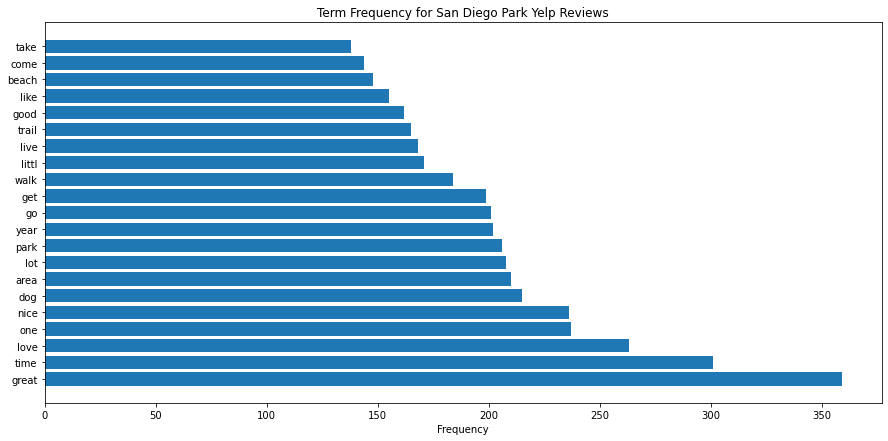

In [17]:
## Vizualization
# Enlarging the Figure Size
plt.figure(figsize=(15,7))
# Making a Barplot
plt.barh([it[1] for it in top20], [it[0] for it in top20])
# Title
plt.title('Term Frequency for San Diego Park Yelp Reviews');
# Xlabel
plt.xlabel('Frequency');

From the exploratory data analysis, it seems that the reviews are mostly positive since terms like "great", "time", and "love" are the most frequent. However, the resuls are not particularly helpful and what would be is finding out recurring topics which a vanilla LDA can do. 

#### **Analysis: LDA Topic Generation**

The first step to using an LDA topic generator is creating a document-term matrix from the corpus, which is the "text" column of the reviews dataframe. 

The "reviews_count" object is the document-term matrix. Each row corresponds to a specific document and each column pertains to a word. This matrix is crucial for the LDA to compute document similarily and split into topics. This process starts with initializing a count vectorizer and applying it to the "text" column of the reviews dataframe. The final shape is 2333 x 4843 which means there are 2333 documents with 4843 unique words (after preprocessing). 

In [18]:
# Initialise the count vectorizer
count_vectorizer = CountVectorizer()

In [19]:
reviews_count = count_vectorizer.fit_transform(reviews["text"])

print(reviews["text"].shape)
print(reviews_count.shape)

(2333,)
(2333, 4843)


Next is to intialize the LDA model. There are three parameters to take not of:

n_components refers to the number of topics the model is to produce

n_jobs set to -1 takes in all processors for consideration

random_state ensures results are replicable

In [20]:
lda = LDA(n_components = 3, n_jobs = -1, random_state = 13)

Fitting the model to the document-term matrix

In [21]:
lda.fit(reviews_count)

LatentDirichletAllocation(n_components=3, n_jobs=-1, random_state=13)

Now, I tested the results with multiple topics ranging from 2 to 5 and found that 3 topics works best. The results are below in an additional "**Appendix**" section. 

To examine the results, I start by printing the top words from the lda model. The details for the function are below. 

In [22]:
# Defining a function to print the top-n words in each Topic
def print_topics(model, count_vectorizer, n_top_words):
    '''
    model = LDA model to be examined
    count_vectorizer = document-term matrix
    n_top_words = How many words to display
    '''
    # Extracting feature names
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        # Select the ith word with top n largest weights
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Printing the topics found by the LDA model
print("Topics found via LDA:")
print_topics(model=lda, count_vectorizer=count_vectorizer, n_top_words=30)

Topics found via LDA:

Topic #0:
love great one time area lot dog beach live nice year park go walk come ive well around get alway play peopl like playground even visit beauti best littl famili

Topic #1:
nice littl park locat great trail realli kid dog field one take get small lot area time walk good go hike easi play see pretti beauti live street busi like

Topic #2:
time review us good work first help trail get look go great covid take back year servic like want day use amaz move experi manag need beauti sinc came walk


My interpretation of the results and the inferred topics are below after visualization. It makes it much easier to discern meaning with an interactive experience. 

An additional benefit to the LDA library is extracting the theta matrix which provides the probability a document pertains to a specific topic. Each column of the matrix is each constructed topic and the values are the probability a given document belongs to that topic. 

In [23]:
theta_matrix = lda.fit_transform(reviews_count)

print(theta_matrix.shape)
print()
print(theta_matrix[:10])

(2333, 3)

[[0.94054559 0.03118607 0.02826834]
 [0.94230946 0.02993257 0.02775797]
 [0.94836312 0.02610466 0.02553223]
 [0.94908888 0.02212461 0.02878651]
 [0.94178205 0.03027025 0.0279477 ]
 [0.95513634 0.02204649 0.02281718]
 [0.02742814 0.34193987 0.63063199]
 [0.53913046 0.03205386 0.42881568]
 [0.94000188 0.02898436 0.03101376]
 [0.54194459 0.02552713 0.43252828]]


Therefore with this theta matrix and directing attention to the first document (row 1), the model suggests there is a 94% probability document one pertains to topic 1. The same logic can be applied to the rest of the documents.

#### **Visualizing Results**

Loading in object to display and dispaying it

In [24]:
LDAvis_prepared = sklearn_lda.prepare(lda, reviews_count, count_vectorizer)

In [25]:
pyLDAvis.display(LDAvis_prepared)


This interactive vizualization provides two plots. The left side is the intertopic distance map after using PCA to reduce the topics into two dimensions. The distances show that each topic is their own entity and occupy a different space without overlap. Meanwhile, the right side shows the most salient (noteworthy or frequent) terms in each topic, which helps infer what Yelp reviewers are focusing on. 

This is the exact results needed to reject the null hypothesis since it seems the text pertains to one of three topics. 

Assuming this project imported correctly, then a user can investigate each topic closer by either using the UI at the top or highlighting one of the topic nodes. 

Inferred Results:

Topic 1: Location/Geography of Park
- The salient terms of this topic revolve around the location and geography of the park. The salient terms "love", "great", "area", "beach", "spot", "beautiful" indicate this. 


Topic 2: Interaction Potential
- The salient terms of this topic revolve around the interaction potential visitors can have while at the park. There are plenty of topics focused on friends, family, and pets alongside playing, hiking, and similar verbs. 

Topic 3: Context of Park
- The salient terms of this topic revolve around the context of the park for the review. There are plenty of time indicating terms alongside the idea of "service this time of year" and "covid". It does seem that reviews are being driven by the context the reviewer attends the park and their experience at the time. 

# Appendix

---
Here are the results for the other potential topics ranging from 2 to 5. By the fifth topic I noticed results were becoming increasingly similar and fragmenting existing topics into their own identities, which does not help meaning too much. It is interesting to see how topics split into other groups but sometimes the splits are random (hence setting a random_state). 

In [26]:
lda_list = []

for i in range(2,6):
  lda = LDA(n_components = i, n_jobs = -1, random_state = 13)
  output = lda.fit(reviews_count)
  print(f"LDA results for", str(i), "topics")
  print_topics(model=lda, count_vectorizer=count_vectorizer, n_top_words=30)
  lda_list.append(output)
  print()

LDA results for 2 topics

Topic #0:
great love time year one live ive dog come first lot area go beach walk covid get alway peopl good nice amaz around like visit review move day best beauti

Topic #1:
trail park nice littl kid great locat get take time area dog lot hike small go realli walk play one like good field well beauti see want easi neighborhood busi

LDA results for 3 topics

Topic #0:
love great one time area lot dog beach live nice year park go walk come ive well around get alway play peopl like playground even visit beauti best littl famili

Topic #1:
nice littl park locat great trail realli kid dog field one take get small lot area time walk good go hike easi play see pretti beauti live street busi like

Topic #2:
time review us good work first help trail get look go great covid take back year servic like want day use amaz move experi manag need beauti sinc came walk

LDA results for 4 topics

Topic #0:
love great time live year one ive beach come go dog alway first get b

In [27]:
LDAvis_prepared = sklearn_lda.prepare(lda_list[0], reviews_count, count_vectorizer)
pyLDAvis.display(LDAvis_prepared)

In [28]:
LDAvis_prepared = sklearn_lda.prepare(lda_list[1], reviews_count, count_vectorizer)
pyLDAvis.display(LDAvis_prepared)

In [29]:
LDAvis_prepared = sklearn_lda.prepare(lda_list[2], reviews_count, count_vectorizer)
pyLDAvis.display(LDAvis_prepared)

In [30]:
LDAvis_prepared = sklearn_lda.prepare(lda_list[3], reviews_count, count_vectorizer)
pyLDAvis.display(LDAvis_prepared)

As we can see in the above LDA results with 5 topics, topics 4 and 5 overlap which means both results are highly similar. Furthermore, it is much more difficult to infer topic meaning with the given splits. This is an example of LDA overfitting and producing topics for the sake of doing so when the results does not have any underlying meaning with this many topics. 

# Ethics & Privacy

The dataset was provided for use in this COGS 108 final project, therefore I have received permission to use these yelp reviews. Furthermore, Yelp reviews are accessible to the public and could be webscraped through an API. Fortunately, Professor Ellis curated the data used. Therefore, there are no major privacy concerns regarding the data. 

The dataframe does identify which park is targeted by the review and their ratings, which means parks are susceptible to bias. This means that a specific park may be targeted by the reviewers for whatever reason but this would be an unintended consequence of the review process rather than the methods of this project. 

Fortunately, since the data was not grouped based on the review scores, the topics pertain to the overall corpus. There are pros and cons to this approach but at least with a general overview of the reviews as a whole, the results 

Lastly, reviewer privacy is guaranteed since the reviews are not tied to an id other than the park they pertain to. Unfortunately, the topics are not generalizable to the populace of San Diego and their sentiments toward their local parks as the only responses come from Yelp reviewers. Overall, the topic generation process relies entirely on the inputted data and the results pertain to those that Yelp reviewers are writing. 

# Conclusion & Discussion

I can successfully reject the null hypothesis that Yelp reviews toward San Diego parks petain to specific aspects of the parks. The Vanilla LDA deployed with potential topic numbers ranging from two to five performed best with three topics. Those topics were inferred to revolve around the (1) the location and geography of the park, (2) the interaction potential of the park, and (3) the context for which the review was writing about the park. 

Unfortunately, the analysis did not aggregate the texts based on review. It would have been interesting to target and identify what reviewers were writing about at the high and low ratings, however this is susceptible to bias. If a reviewer is very inclined to write a great or criticizing review, then they are likely to and be biased enough to attach a corresponding great or criticizing rating. 

All in all, the LDA worked well and provided a great overview of what Yelp reviewers and potentially the San Diego populace focuses on when writing about parks. This is great information for the department of parks and recreation who can use it to potentially improve parks in the future. Now, a parks location or geography cannot be significantly altered, however adjusting the space and potential interaction effects for visitors is a great measure for people, especially yelp reviewers, to discuss the parks in a further positive light. 